Probability of Waiting Between 2 and 4 Hours

In [2]:
import numpy as np
from scipy.integrate import quad

# Define the probability density function (pdf)
def pdf(y):
    return 0.4242424242424242 * np.exp(-5 * y**2) + 0.5757575757575757 * np.exp(-3 * y**8)

# Integrate the pdf from 2 to 4
probability, _ = quad(pdf, 2, 4)

print(f"Probability of waiting between 2 and 4 hours: {probability:.12f}")



Probability of waiting between 2 and 4 hours: 0.000000000043


In [3]:
import numpy as np
from scipy.integrate import quad

# Define the probability density function (pdf)
def pdf(y):
    return 42/99 * np.exp(-5 * y**2) + 57/99 * np.exp(-3 * y**8)

# Integrate the pdf from 2 to 4
probability, _ = quad(pdf, 2, 4)

print(f"Probability of waiting between 2 and 4 hours: {probability:.12f}")


Probability of waiting between 2 and 4 hours: 0.000000000043


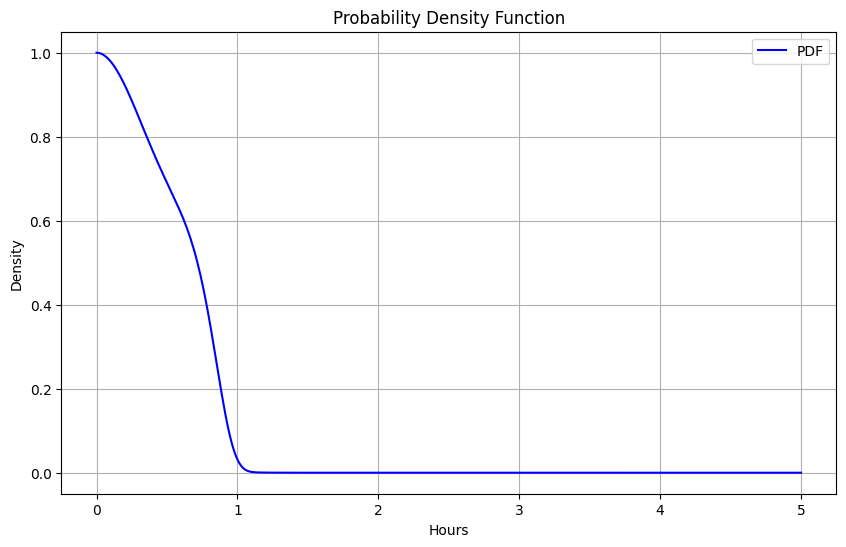

In [4]:
import matplotlib.pyplot as plt

y_values = np.linspace(0, 5, 400)
plt.figure(figsize=(10, 6))
plt.plot(y_values, [pdf(y) for y in y_values], label='PDF', color='blue')
plt.title('Probability Density Function')
plt.xlabel('Hours')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()


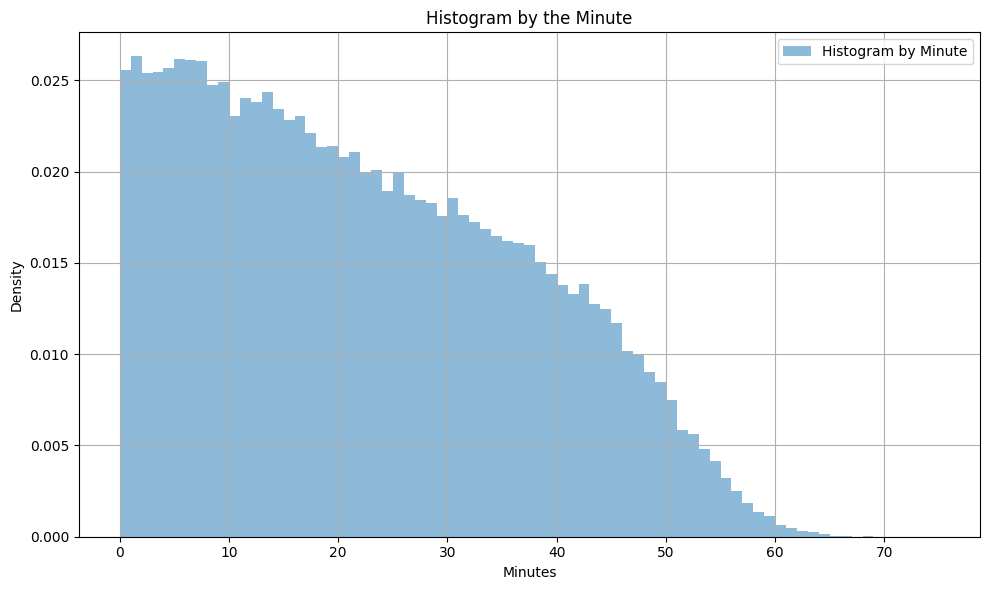

In [6]:
# Generate samples using rejection sampling
def generate_samples(n=100000):
    samples = []
    max_val = max([pdf(y) for y in np.linspace(0, 5, 1000)])
    while len(samples) < n:
        y = 5 * np.random.rand()
        u = np.random.rand()
        if u < pdf(y) / max_val:
            samples.append(y * 60)  # Convert to minutes

    return samples

samples = generate_samples()
plt.figure(figsize=(10, 6))

# Adjust the number of bins and range for better visualization
bin_width = 1  # 1 minute per bin
bins = np.arange(0, max(samples) + bin_width, bin_width)

plt.hist(samples, bins=bins, density=True, alpha=0.5, label='Histogram by Minute')
plt.title('Histogram by the Minute')
plt.xlabel('Minutes')  # Corrected to minutes
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
# Compute mean and variance
mean = np.mean(samples)
variance = np.var(samples)

# Compute quartiles using numpy
Q1, Q2, Q3 = np.percentile(samples, [25, 50, 75])

print(f"Mean: {mean:.2f} hours")
print(f"Variance: {variance:.2f} hours^2")
print(f"Q1: {Q1:.2f} hours")
print(f"Q2 (Median): {Q2:.2f} hours")
print(f"Q3: {Q3:.2f} hours")


Mean: 22.54 hours
Variance: 221.94 hours^2
Q1: 9.73 hours
Q2 (Median): 20.68 hours
Q3: 33.99 hours


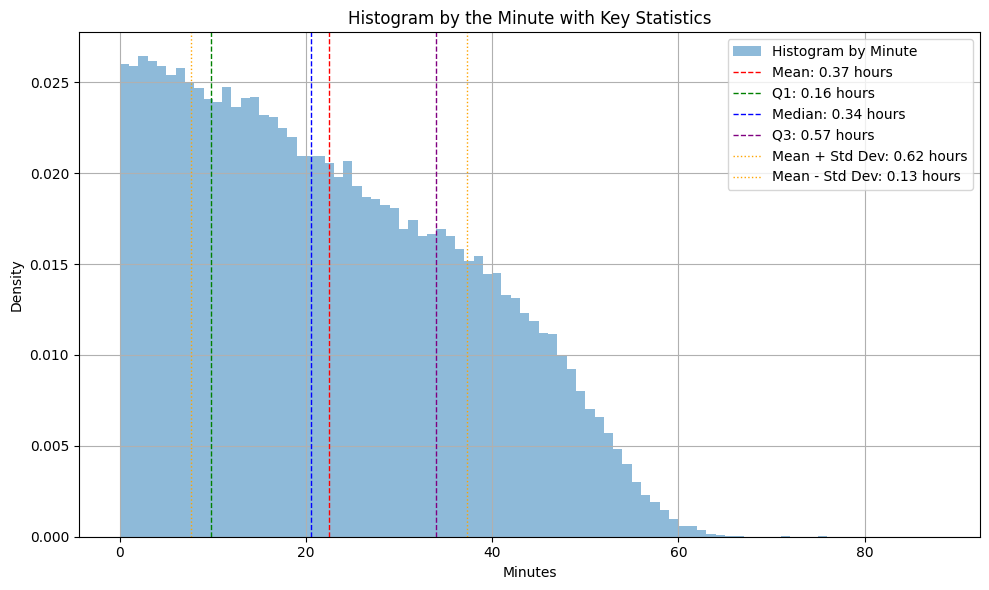

In [8]:
# Generate samples using rejection sampling
def generate_samples(n=100000):
    samples = []
    max_val = max([pdf(y) for y in np.linspace(0, 5, 1000)])
    while len(samples) < n:
        y = 5 * np.random.rand()
        u = np.random.rand()
        if u < pdf(y) / max_val:
            samples.append(y * 60)  # Convert to minutes

    return samples

samples = generate_samples()
plt.figure(figsize=(10, 6))

# Adjust the number of bins and range for better visualization
bin_width = 1  # 1 minute per bin
bins = np.arange(0, max(samples) + bin_width, bin_width)

plt.hist(samples, bins=bins, density=True, alpha=0.5, label='Histogram by Minute')

# Compute mean and variance
mean = np.mean(samples)
variance = np.var(samples)

# Compute quartiles using numpy
Q1, Q2, Q3 = np.percentile(samples, [25, 50, 75])

# Plot vertical lines for mean, quartiles, and mean ± standard deviation (to represent variance)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean/60:.2f} hours')
plt.axvline(Q1, color='green', linestyle='dashed', linewidth=1, label=f'Q1: {Q1/60:.2f} hours')
plt.axvline(Q2, color='blue', linestyle='dashed', linewidth=1, label=f'Median: {Q2/60:.2f} hours')
plt.axvline(Q3, color='purple', linestyle='dashed', linewidth=1, label=f'Q3: {Q3/60:.2f} hours')
plt.axvline(mean + np.sqrt(variance), color='orange', linestyle='dotted', linewidth=1, label=f'Mean + Std Dev: {(mean + np.sqrt(variance))/60:.2f} hours')
plt.axvline(mean - np.sqrt(variance), color='orange', linestyle='dotted', linewidth=1, label=f'Mean - Std Dev: {(mean - np.sqrt(variance))/60:.2f} hours')

plt.title('Histogram by the Minute with Key Statistics')
plt.xlabel('Minutes')
plt.ylabel('Density')
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
